# Letter Recognition

## Importing libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset & set column names

In [26]:
data = pd.read_csv('Dataset/letter-recognition.data', header=None)

columns = [
    "letter", "x_box", "y_box", "width", "height", "onpix",
    "x_bar", "y_bar", "x2bar", "y2bar", "xybar",
    "x2ybr", "xy2br", "x_edge", "xegvy", "y_edge", "yegvx"
]
data.columns = columns

data.head()

,letter,x_box,y_box,width,height,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_edge,xegvy,y_edge,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## Data checking & cleaning

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   x_box   20000 non-null  int64 
 2   y_box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x_bar   20000 non-null  int64 
 7   y_bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x_edge  20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y_edge  20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [28]:
data.describe()

,x_box,y_box,width,height,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_edge,xegvy,y_edge,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [29]:
data.isna().sum()

letter    0
x_box     0
y_box     0
width     0
height    0
onpix     0
x_bar     0
y_bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x_edge    0
xegvy     0
y_edge    0
yegvx     0
dtype: int64

In [30]:
data = data.dropna()

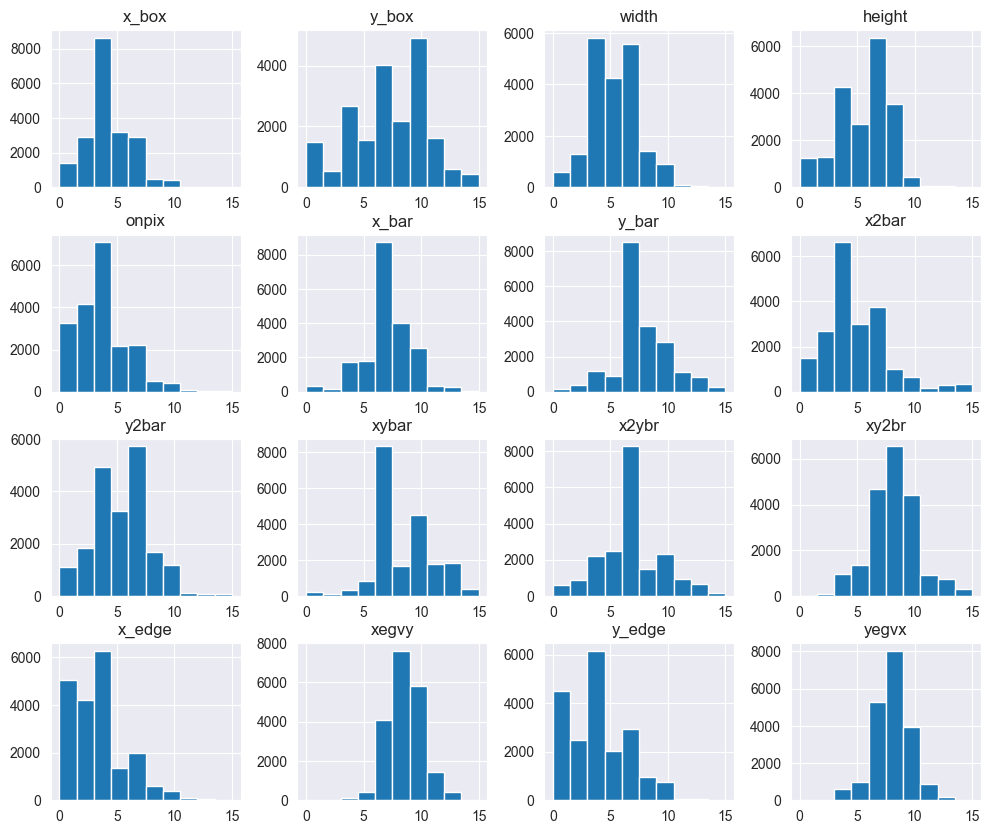

In [31]:
# Check the distribution of each feature
data.iloc[:,1:].hist(figsize=(12,10))
plt.show()

→ Hầu hết đặc trưng có phân phối không đều.

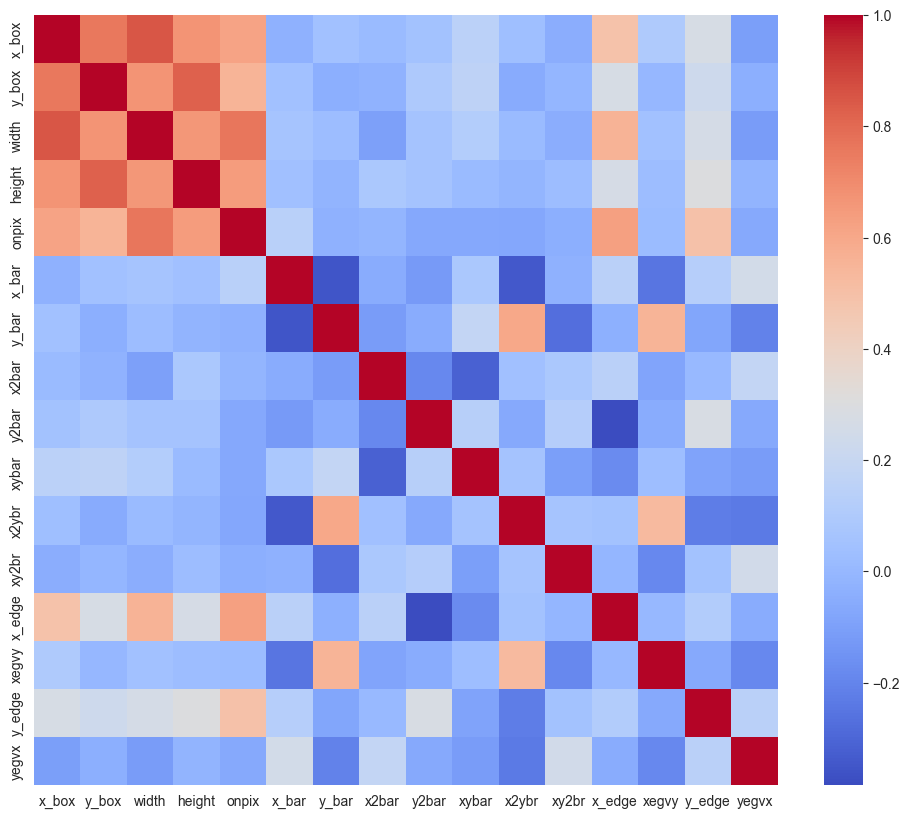

In [32]:
# Check correlation
plt.figure(figsize=(12,10))
sns.heatmap(data.iloc[:,1:].corr(), cmap='coolwarm')
plt.show()

→ Một số đặc trưng tương quan cao (x_bar ~ x2bar, y_bar ~ y2bar).

## Split Train / Test data

In [33]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:].values     # 16 features
y = data['letter'].values       # labels A–Z

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

- `test_size=0.2` → 20% cho kiểm thử
- `stratify=y` → giữ tỉ lệ nhãn A–Z đồng đều trong train và test

## Standardize data

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Xây dựng mô hình Naive Bayes

Đang khởi tạo và huấn luyện mô hình (tính toán Mean/Var)...
Đang chạy dự đoán trên tập Test (sẽ mất vài giây)...

 KẾT QUẢ ĐÁNH GIÁ CHI TIẾT 

--- 1. CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           A       0.85      0.87      0.86       158
           B       0.48      0.72      0.57       153
           C       0.80      0.82      0.81       147
           D       0.62      0.72      0.66       161
           E       0.61      0.38      0.47       154
           F       0.70      0.77      0.73       155
           G       0.59      0.55      0.57       155
           H       0.58      0.35      0.44       147
           I       0.52      0.71      0.60       151
           J       0.83      0.71      0.77       149
           K       0.49      0.49      0.49       148
           L       0.91      0.78      0.84       152
           M       0.69      0.88      0.77       158
           N       0.89      0.68      0.77       157
           O 

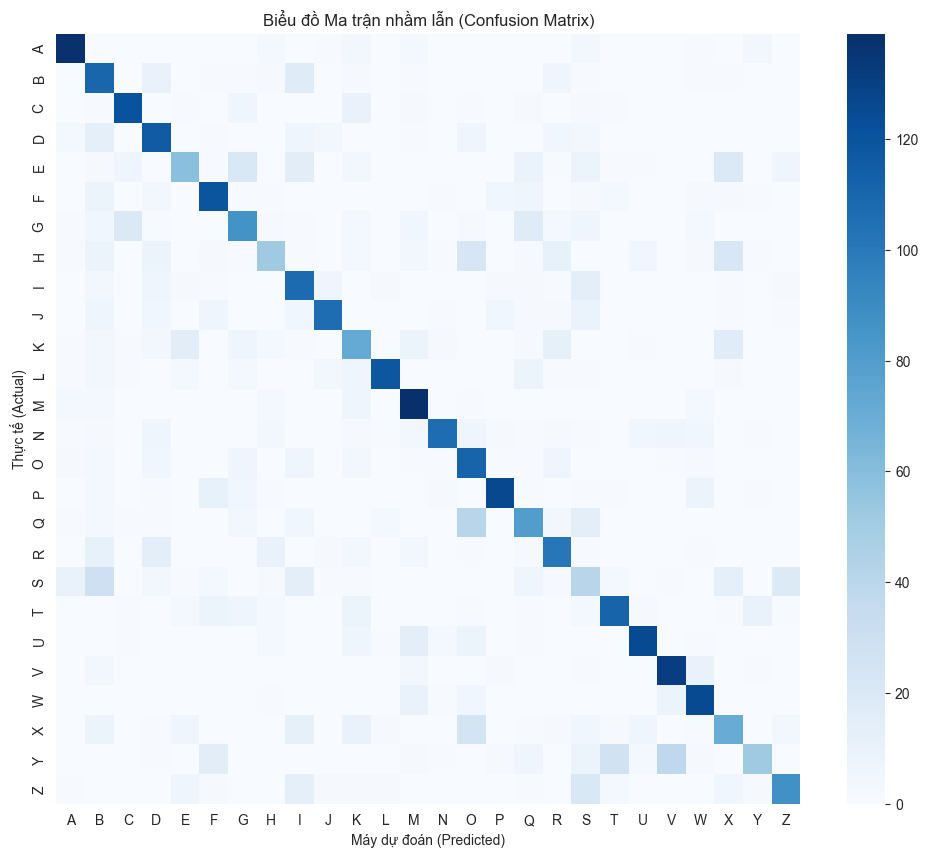

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


train_df_input = pd.DataFrame(X_train_scaled)
train_df_input.insert(0, 'target', y_train) # Chèn cột Target vào đầu

class Naive_Bayes:
  def __init__(self, data_set):
    self.ds = data_set
    # Trong LetterRecognition, sau khi ghép ở trên, cột 0 (tên là 'target') là class
    self.target_col = 'target'

    # Tính mean và variance cho từng feature của từng class
    self.ds_means = self.ds.groupby(self.target_col).mean()
    self.ds_variances = self.ds.groupby(self.target_col).var()

    # Tính xác suất tiên nghiệm (Prior probabilities)
    self.class_probabilities = self.get_class_probabilities(self.ds)

  def get_class_probabilities(self, data_set):
    class_sizes = data_set.groupby(self.target_col).size()
    ds_total = data_set.shape[0]
    probs = {}
    for item in class_sizes.items():
      probs[item[0]] = item[1] / ds_total
    return probs

  def get_probability_density(self, x, mean, variance):
    # Thêm 1e-9 để tránh lỗi chia cho 0 nếu variance quá nhỏ
    variance = max(variance, 1e-9)
    pd = 1 / (np.sqrt(2 * np.pi * variance)) * np.exp((-(x - mean)**2) / (2 * variance))
    return pd

  def predict(self, x):
    feature_class_probabilities = {}

    for group, class_prob in self.class_probabilities.items():
      feature_class_probabilities[group] = class_prob

      # Lấy thông số mean/var của group hiện tại
      # (Dùng iloc để lấy giá trị vì x là list số, không có tên cột)
      group_means = self.ds_means.loc[group]
      group_vars = self.ds_variances.loc[group]

      for i in range(len(x)):
        # Tính xác suất P(xi | class) và nhân dồn vào
        mean = group_means.iloc[i]
        var = group_vars.iloc[i]
        feature_class_probabilities[group] *= self.get_probability_density(x[i], mean, var)

    # Chọn class có xác suất cao nhất
    feature_class = max(feature_class_probabilities, key=feature_class_probabilities.get)
    return feature_class


print("Đang khởi tạo và huấn luyện mô hình (tính toán Mean/Var)...")
nb = Naive_Bayes(train_df_input)

print("Đang chạy dự đoán trên tập Test (sẽ mất vài giây)...")
y_pred = []
# Lặp qua từng mẫu trong tập test để dự đoán
for x in X_test_scaled:
    prediction = nb.predict(x)
    y_pred.append(prediction)

print("\n" + "="*60)
print(" KẾT QUẢ ĐÁNH GIÁ CHI TIẾT ")
print("="*60)

# 1. Bảng báo cáo chỉ số (Precision, Recall, F1)
print("\n--- 1. CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

# 2. Ma trận nhầm lẫn (Confusion Matrix)
print("\n--- 2. CONFUSION MATRIX (Top 5 cặp nhầm lẫn) ---")
cm = confusion_matrix(y_test, y_pred)
labels = sorted(list(set(y_test)))

# Tìm các cặp bị nhầm lẫn nhiều nhất để in ra
np.fill_diagonal(cm, 0) # Bỏ qua đường chéo chính (dự đoán đúng)
indices = np.dstack(np.unravel_index(np.argsort(cm.ravel())[-5:], cm.shape))[0][::-1]

for row, col in indices:
    print(f"- Thực tế là '{labels[row]}' nhưng máy đoán là '{labels[col]}' ({cm[row, col]} lần)")

# 3. Vẽ biểu đồ (Heatmap)
plt.figure(figsize=(12, 10))
# Tính lại CM đầy đủ để vẽ
cm_full = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_full, annot=False, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Biểu đồ Ma trận nhầm lẫn (Confusion Matrix)')
plt.xlabel('Máy dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.show()